In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import importlib
from os import listdir
from os.path import isfile, join

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 20,
    "font.size": 20,
    "legend.fontsize": 16,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [2]:
############## Select device ################

device = 'fluxonium' # change here to change the device: charge_qubit, flopping_spin, flopping_charge, transmon, fluxonium

#############################################

data = np.load('../../data/params/'+device+'.npz', allow_pickle=True)
wq, g, kappa, dim = data['wq'], data['g'], data['kappa'], data['dim']

In [3]:
###### List available file to be plotted ########

path = '../../data/'+device+'/g_parallel/'

for file in os.listdir(path):
    if file.endswith(".npz"):
        print(file)

#################################################

N_rep=25_n_states=25_dim=110_num_w=101.npz
N_rep=15_n_states=10_dim=110_num_w=101.npz


In [4]:
############# Select one set of parameters ################

n_states_list = [10]
N_rep_list = [15]

dim = 110
num_w = 101

###########################################################

In [5]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

10


/nobackup/my_python2/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/nobackup/my_python2/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_4699/1188728258.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


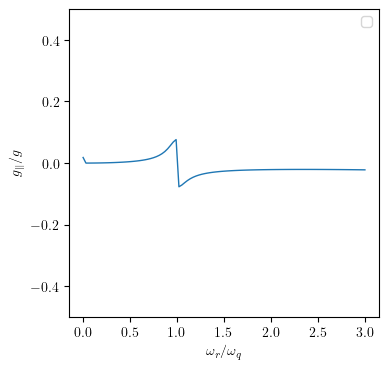

In [9]:
%matplotlib inline

import matplotlib.colors as mcolors
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

fig, ax = plt.subplots(figsize=(4,4), dpi=100)

for i, n_states in enumerate(n_states_list):
    for j, N_rep in enumerate(N_rep_list):
        fname = '../../data/'+device+'/g_parallel/N_rep='+str(N_rep)+'_n_states='+str(n_states)\
                +'_dim='+str(dim)+'_num_w='+str(num_w)

        import_npz(fname+'.npz')

        for idx, A_q in enumerate(Alist):
            #if g_parallel_0.any():
                #ax.plot(wlist/wq,np.abs((g_parallel[:,idx]-g_parallel_0[:,idx])/g_parallel[:,idx]), color=colors[idx], label=r'$g_\parallel$')
            if idx == 0:
                ax.plot(wlist/wq, g_parallel[:,idx]/g, color=cmap.colors[j], lw=idx+1, alpha=(i+1)/(len(n_states_list)))

ax.set_xlabel(r'$\omega_r/\omega_q$')

ax.set_ylabel(r'$g_\parallel/g$')

ax.legend()

ax.set_ylim(-0.5, 0.5)
plt.show()